# Graphs - NetworkX

- **Created by Andrés Segura Tinoco**
- **Created on Nov 27, 2019**

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [1]:
# Load the Python libraries
import networkx as nx
import math
import timeit

In [2]:
# Load Plotting libraries
import matplotlib.pyplot as plt

In [3]:
print('Networkx version:', nx.__version__)

Networkx version: 2.3


## 1. Graph or Undirected Simple Graph

A graph (sometimes called undirected graph for distinguishing from a directed graph) is a pair $ G = (V, E) $, where $V$ is a set whose elements are called vertices (singular: vertex), and $E$ is a set of two-sets (sets with two distinct elements) of vertices, whose elements are called edges (sometimes links or lines).

In [4]:
# Create an empty Undirected Simple Graph (USG)
usg = nx.Graph()

In [5]:
# Add nodes
usg.add_nodes_from([1, 2, 3, 4, 5])
print(usg.nodes())

[1, 2, 3, 4, 5]


In [6]:
# Add edges
usg.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (3, 2), (4, 2), (4, 3), (5, 4)])
print(usg.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 4), (4, 5)]


In [7]:
# Function that calculates the graph density
def get_graph_density(g):
    n_nodes = len(g.nodes())
    n_edges = len(g.edges())
    
    if nx.is_directed(g):
        density = n_edges / (n_nodes * (n_nodes - 1))
    else:
        density = 2 * n_edges / (n_nodes * (n_nodes - 1))
    
    return density

In [8]:
# Calculate the graph density
density = get_graph_density(usg)
print('Graph density:', density)

Graph density: 0.8


In [9]:
# Get neighbors of node 1
list(usg.neighbors(1))

[2, 3, 4, 5]

In [10]:
# Get nodes positions with spring layout
pos = nx.layout.spring_layout(usg)
pos

{1: array([-0.13262559,  0.30893109]),
 2: array([ 0.63222721, -0.34381132]),
 3: array([0.6293805 , 0.34480629]),
 4: array([-0.12898213, -0.30894653]),
 5: array([-1.00000000e+00, -9.79517691e-04])}

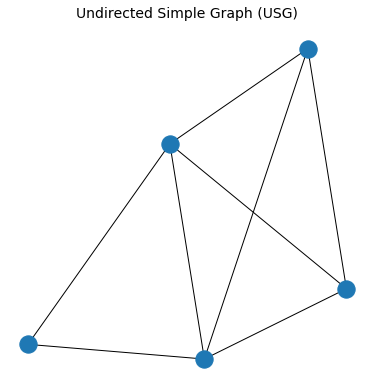

In [11]:
# Plot Simple Graph (free format)
plt.rcParams["figure.figsize"] = [5, 5]
nx.draw(usg)
plt.title('Undirected Simple Graph (USG)', fontsize=14)
plt.axis('off')
plt.show()

## 2. Minimum Spanning Tree of an Undirected Weighted Graph

A minimum spanning tree <b>(MST)</b> or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph <b>(UWG)</b> that connects all the vertices together, without any cycles and with the minimum possible total edge weight.

In [12]:
# Create an empty Undirected Weighted Graph (UWG)
uwg = nx.Graph()

In [13]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5, 6, 7]
uwg.add_nodes_from(nodes_list)

In [14]:
# Add weighted edges
edges = [(1, 2, 1), (1, 4, 4), (2, 3, 2), (2, 4, 6), (2, 5, 4), (3, 5, 5), 
         (3, 6, 6), (4, 5, 3), (4, 7, 4), (5, 6, 8), (5, 7, 7), (6, 7, 3)]
uwg.add_weighted_edges_from(edges)

In [15]:
# Calculate the graph density
density = get_graph_density(uwg)
print('Graph density:', density)

Graph density: 0.5714285714285714


#### The MST with the Prim algorithm

In [16]:
# Calculate a minimum spanning tree of an undirected weighted graph with the Prim algorithm
mst = nx.minimum_spanning_tree(uwg, algorithm='prim')
print(sorted(mst.edges(data=True)))

[(1, 2, {'weight': 1}), (1, 4, {'weight': 4}), (2, 3, {'weight': 2}), (4, 5, {'weight': 3}), (4, 7, {'weight': 4}), (6, 7, {'weight': 3})]


#### The MST with the Kruskal algorithm from Scratch

Below, the Kruskal's minimum spanning tree algorithm with utility functions for sets union.

In [17]:
# A utility function to find set of an element n
def find(s, n):
    if s[n] == n:
        return n
    return find(s, s[n])

# A function that does union of two sets of u and v (uses union by rank)
def union(s, r, u, v):
    comp_u = find(s, u)
    comp_v = find(s, v)
    
    if r[comp_u] < r[comp_v]:
        s[comp_u] = comp_v
    elif r[comp_u] > r[comp_v]:
        s[comp_v] = comp_u
    else:
        s[comp_v] = comp_u
        r[comp_u] += 1

In [18]:
# Find the minimum spanning tree into the graph
def get_mst_kruskal(uwg, verbose=False):
    start_time = timeit.default_timer()
    min_tree = []
    
    # Sort all the edges in non-decreasing order of their weight
    edges = uwg.edges(data=True)
    edges = sorted(edges, key=lambda t: t[2].get('weight', 1))
    n_edges = len(edges)
    n_nodes = len(uwg.nodes())
    
    # Create N subsets with single elements
    s_tree = dict()
    rank = dict()
    for node in uwg.nodes():
        s_tree[node] = node
        rank[node] = 0
    
    if verbose:
        print('>> n_nodes:', n_nodes, ', n_edges:', n_edges)
    
    ix = 0
    while len(min_tree) < n_nodes - 1 and ix < n_edges:
        u, v, w = edges[ix]
        comp_u = find(s_tree, u)
        comp_v = find(s_tree, v)
        if verbose:
            print('>> ix:', ix, ', edge:', edges[ix])
        
        if comp_u != comp_v:
            union(s_tree, rank, comp_u, comp_v)
            min_tree.append(edges[ix])
            
            if verbose:
                print('   added edge in comp_u:', comp_u, ', comp_v:', comp_v)
        else:
            print('   rejected edge')
        ix += 1
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return min_tree

In [19]:
# Calculate a minimum spanning tree from scratch with the Prim algorithm
mst_edges = get_mst_kruskal(uwg, True)
print(sorted(mst_edges))

>> n_nodes: 7 , n_edges: 12
>> ix: 0 , edge: (1, 2, {'weight': 1})
   added edge in comp_u: 1 , comp_v: 2
>> ix: 1 , edge: (2, 3, {'weight': 2})
   added edge in comp_u: 1 , comp_v: 3
>> ix: 2 , edge: (4, 5, {'weight': 3})
   added edge in comp_u: 4 , comp_v: 5
>> ix: 3 , edge: (6, 7, {'weight': 3})
   added edge in comp_u: 6 , comp_v: 7
>> ix: 4 , edge: (1, 4, {'weight': 4})
   added edge in comp_u: 1 , comp_v: 4
>> ix: 5 , edge: (2, 5, {'weight': 4})
   rejected edge
>> ix: 6 , edge: (4, 7, {'weight': 4})
   added edge in comp_u: 1 , comp_v: 6
>> elapsed time 15.519400000000001 ms
[(1, 2, {'weight': 1}), (1, 4, {'weight': 4}), (2, 3, {'weight': 2}), (4, 5, {'weight': 3}), (4, 7, {'weight': 4}), (6, 7, {'weight': 3})]


#### Plotting Minimum Spanning Tree of an UWG

In [20]:
# We then set the coordinates of each node
uwg.node[1]['pos'] = (0, 2)
uwg.node[2]['pos'] = (3, 2)
uwg.node[3]['pos'] = (6, 2)
uwg.node[4]['pos'] = (0, 0)
uwg.node[5]['pos'] = (3, 0)
uwg.node[6]['pos'] = (6, 0)
uwg.node[7]['pos'] = (3,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(uwg, 'pos')

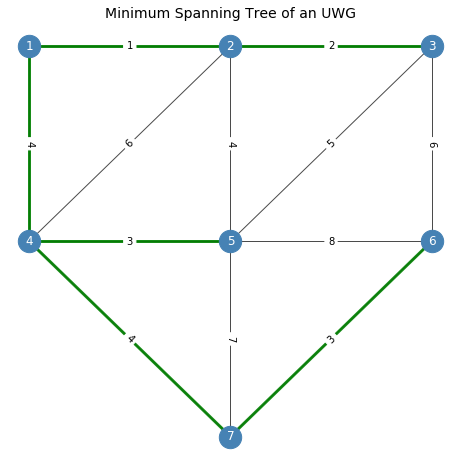

In [21]:
# Nodes labels
labels = {}
for n in uwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(uwg, pos, nodelist=uwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(uwg, pos, edgelist=uwg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_edges(uwg, pos, edgelist=mst_edges,   width=3, alpha=0.9, edge_color='green')
nx.draw_networkx_labels(uwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(uwg, pos, edge_labels=weights, font_color='black')
plt.title('Minimum Spanning Tree of an UWG', fontsize=14)
plt.axis('off')
plt.show()

 ## 3. Shortest Path of a Directed Weighted Graph

A directed graph or digraph is a graph in which edges have orientations.

In [22]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [23]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5]
dwg.add_nodes_from(nodes_list)

In [24]:
# Add weighted edges
edges = [(1, 2, 50), (1, 3, 30), (1, 4, 100), (1, 5, 10), (3, 2, 5), (4, 2, 20), (4, 3, 50), (5, 4, 10)]
dwg.add_weighted_edges_from(edges)

In [25]:
# Calculate the graph density
density = get_graph_density(dwg)
print('Graph density:', density)

Graph density: 0.4


#### The Shortest Path with the Dijkstra algorithm

Given a directed graph $ G = \langle V, E \rangle $, the time complexity of Dijkstra's algorithm is $ \Theta (V^2) $ but with **min-priority queue** it drops down to $ \Theta((E + V) \thinspace log{V}) $.

In [26]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path(dwg, source = 1, target = 2)
sp

[1, 3, 2]

In [27]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path_length(dwg, source = 1, target = 2)
sp

35

#### The Dijkstra algorithm from Scratch

Below, a detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights is shown.

In [28]:
# Returns the node with a minimum own distance
def get_min_node(nodes, weights):
    min_node = -1
    min_weigth = math.inf
    
    for n in nodes:
        w = weights[n]
        if w < min_weigth:
            min_node = n
            min_weigth = w
    
    return min_node

In [29]:
# A detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights 
def get_dijkstra_dist(graph, source, verbose=False):
    nodes = list(graph.nodes())
    edges = graph.edges()
    
    # Init distances
    dists = dict()
    for n in nodes:
        dists[n] = (0 if n == source else math.inf)
    paths = dict()
    for n in nodes:
        paths[n] = source
    
    # Greedy cycle
    v = source
    while len(nodes) > 1:        
        nodes.remove(v)
        if verbose:
            print('>> curr node:', v, ', len:', len(nodes))
        
        # Update weights
        for w in nodes:
            if (v, w) in edges:
                if dists[w] > dists[v] + edges[v, w]['weight']:
                    dists[w] = dists[v] + edges[v, w]['weight']
                    paths[w] = v
                    if verbose:
                        print('   v:', v, ', w:', w, ', weigth:', dists[w])
        
        # Get the node with a minimum own distance
        v = get_min_node(nodes, dists)
        if v == -1:
            break
        
    return { 'distances': dists, 'paths': paths }

In [30]:
# Show shortes path from source node to target node
def get_shortes_path(dwg, source, target, verbose=False):
    
    # Validation
    if not source in dwg.nodes() or not target in dwg.nodes():
        print('Both the source and the target must exist in the graph.')
        return {}
    
    start_time = timeit.default_timer()
    
    # Get the distance from 'source' to the other nodes
    sol = get_dijkstra_dist(dwg, source, verbose)
    paths = sol['paths']
    
    # Get shortest path from 'source' to 'target'
    ix = target
    path = [ix]
    while ix != source:
        ix = paths[ix]
        path.append(ix)
    path.reverse()
    
    weight = sol['distances'][target]
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return { 'path': path, 'weight': weight }

In [31]:
# Example of the shortes path calculation from '1' to '2'
source = 1
target = 2
sp_sol = get_shortes_path(dwg, source, target, True)
sp_sol

>> curr node: 1 , len: 4
   v: 1 , w: 2 , weigth: 50
   v: 1 , w: 3 , weigth: 30
   v: 1 , w: 4 , weigth: 100
   v: 1 , w: 5 , weigth: 10
>> curr node: 5 , len: 3
   v: 5 , w: 4 , weigth: 20
>> curr node: 4 , len: 2
   v: 4 , w: 2 , weigth: 40
>> curr node: 3 , len: 1
   v: 3 , w: 2 , weigth: 35
>> elapsed time 7.151699999999983 ms


{'path': [1, 3, 2], 'weight': 35}

#### Plotting Shortest Path of a DWG

In [32]:
# We then set the coordinates of each node
dwg.node[1]['pos'] = (0, 0)
dwg.node[2]['pos'] = (2, 2)
dwg.node[3]['pos'] = (2,-2)
dwg.node[4]['pos'] = (5, 2)
dwg.node[5]['pos'] = (5,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

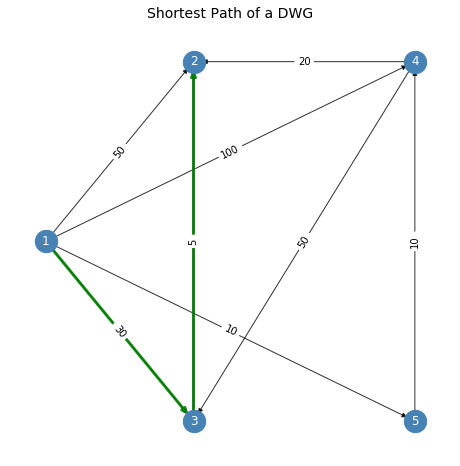

In [33]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

sp_edges = []
for i in range(len(sp_sol['path']) - 1):
    e = (sp_sol['path'][i], sp_sol['path'][i+1])
    sp_edges.append(e)

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_edges(dwg, pos, edgelist=sp_edges,    width=3, alpha=0.9, edge_color='green')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Shortest Path of a DWG', fontsize=14)
plt.axis('off')
plt.show()

## 4. Floyd-Warshall algorithm

The **Floyd–Warshall** algorithm is a method for finding shortest paths in a weighted graph with positive or negative edge weights (but with no negative cycles).

The Floyd–Warshall algorithm compares all possible paths through the graph between each pair of vertices. It is able to do this with $ \Theta (|V|^{3}) $ comparisons in a graph.

In [34]:
# Algorithm for finding shortest paths in a directed weighted graph
def floyd_warshall_paths(g, verbose=False):
    start_time = timeit.default_timer()
    
    edges = g.edges(data=True)
    vertices = list(g.nodes())
    n_vertices = len(vertices)
    
    # Init dist matrix
    dist = [[math.inf for j in range(n_vertices)] for i in range(n_vertices)]
    path = [[None for j in range(n_vertices)] for i in range(n_vertices)]
    
    for (u, v, w) in edges:
        u = u - 1
        v = v - 1
        w = w['weight']
        dist[u][v] = w
        path[u][v] = v + 1
    
    for v in range(n_vertices):
        dist[v][v] = 0
        path[v][v] = v + 1
    
    if verbose:
        print('>> run floyd-warshall algorithm')
        
    for k in range(n_vertices):
        for i in range(n_vertices):
            for j in range(n_vertices):
                new_val = dist[i][k] + dist[k][j]
                
                if dist[i][j] > new_val:
                    dist[i][j] = new_val
                    path[i][j] = path[i][k]
                    
                    if verbose:
                        print('   update edge (', i, ',', j, '), value:', new_val)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    # Return nodes and dist matrix
    return {'nodes': vertices, 'dist': dist, 'path': path}

In [35]:
# Calculate the Floyd-Warshall paths
sol = floyd_warshall_paths(dwg, True)

>> run floyd-warshall algorithm
   update edge ( 0 , 1 ), value: 35
   update edge ( 4 , 1 ), value: 30
   update edge ( 4 , 2 ), value: 60
   update edge ( 0 , 3 ), value: 20
>> elapsed time 8.6986 ms


In [36]:
# Show Floyd-Warshall results
'nodes:', sol['nodes']

('nodes:', [1, 2, 3, 4, 5])

In [37]:
print('dist matrix:')
sol['dist']

dist matrix:


[[0, 35, 30, 20, 10],
 [inf, 0, inf, inf, inf],
 [inf, 5, 0, inf, inf],
 [inf, 20, 50, 0, inf],
 [inf, 30, 60, 10, 0]]

In [38]:
print('path matrix:')
sol['path']

path matrix:


[[1, 3, 3, 5, 5],
 [None, 2, None, None, None],
 [None, 2, 3, None, None],
 [None, 2, 3, 4, None],
 [None, 4, 4, 4, 5]]

In [39]:
# Returns the shortest path from a Floyd-Warshall distance matrix
def get_path(paths, u, v):
    
    # Validation
    if paths[u - 1][v - 1] is None:
        return []
    
    # Build the shortest path
    path = [u]
    while u != v:
        u = paths[u - 1][v - 1]
        path.append(u)
    
    return path

In [40]:
# Show the shortes path from '1' to '2'
source = 1
target = 2
get_path(sol['path'], source, target)

[1, 3, 2]

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>